In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!unzip /content/drive/MyDrive/devnagari_digit.zip

Streaming output truncated to the last 5000 lines.
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10299.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10300.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10301.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10302.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10303.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10304.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10306.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10307.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104017.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104018.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104019.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104021.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104023.p

In [ ]:
!ls /content/DevanagariHandwrittenDigitDataset


Test  Train


In [ ]:
import tensorflow as tf
print(tf.keras.__version__)

3.8.0


In [ ]:
import numpy as np
# Simple function f(x) = x^2
def f(x):
  return x ** 2
# Manual derivative (f’(x) = 2x)
def gradient(x):
  return 2 * x
# Update rule: x = x - learning_rate * gradient
x = 5.0
learning_rate = 0.1
for _ in range(10): # Manually optimize for 10 steps
  x -= learning_rate * gradient(x)
  print(f"x: {x}, f(x): {f(x)}")

x: 4.0, f(x): 16.0
x: 3.2, f(x): 10.240000000000002
x: 2.56, f(x): 6.5536
x: 2.048, f(x): 4.194304
x: 1.6384, f(x): 2.68435456
x: 1.31072, f(x): 1.7179869184000003
x: 1.0485760000000002, f(x): 1.0995116277760004
x: 0.8388608000000002, f(x): 0.7036874417766403
x: 0.6710886400000001, f(x): 0.45035996273704976
x: 0.5368709120000001, f(x): 0.2882303761517119


In [ ]:
import tensorflow as tf
x = tf.Variable(5.0) # Trainable variable
with tf.GradientTape() as tape:
  y = x ** 2 # y = x^2
  grad = tape.gradient(y, x) # Computes dy/dx automatically
  print(grad.numpy()) # Output: 10.0

10.0


In [ ]:
import numpy as np
import tensorflow as tf
import time
# Create large random matrices
size = (1000, 1000)
A = np.random.rand(*size)
B = np.random.rand(*size)
# NumPy Multiplication
start = time.time()
C_numpy = np.dot(A, B)
print("NumPy Time:", time.time() - start)
# TensorFlow Multiplication (for colab uses GPU Runtime if available)
A_tf = tf.constant(A)
B_tf = tf.constant(B)
start = time.time()
C_tf = tf.matmul(A_tf, B_tf)
print("TensorFlow Time:", time.time() - start)

NumPy Time: 0.17903804779052734
TensorFlow Time: 0.263397216796875


In [ ]:
from tensorflow.keras.layers import Dense

layer = Dense(64, activation='sigmoid')


In [ ]:
for epoch in range(10):
# Forward pass
  y_pred = np.dot(x_train, weights)
# Compute loss
  loss = np.mean((y_pred - y_train) ** 2)
# Compute gradients manually
  gradients = 2 * np.dot(x_train.T, (y_pred - y_train)) / len(x_train)
# Update weights
  weights -= learning_rate * gradients

NameError: name 'x_train' is not defined

In [ ]:
import os

train_dir = "dataset/Train/"
test_dir = "dataset/Test/"

print("Train directory exists:", os.path.exists(train_dir))
print("Test directory exists:", os.path.exists(test_dir))


Train directory exists: False
Test directory exists: False


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

train_dir = "dataset/Train/"
test_dir = "dataset/Test/"

print("Train directory exists:", os.path.exists(train_dir))
print("Test directory exists:", os.path.exists(test_dir))


Train directory exists: False
Test directory exists: False


Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


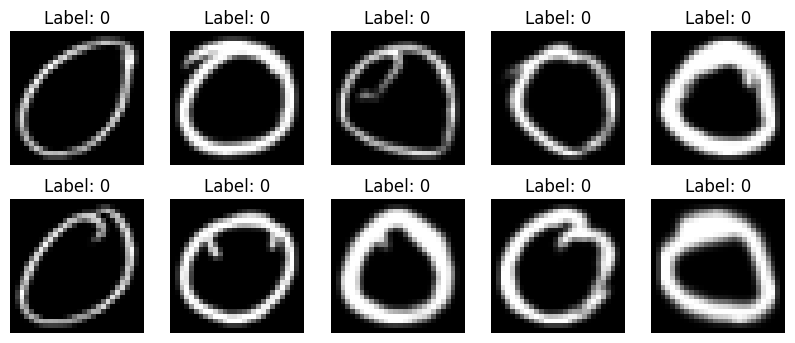

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from PIL import Image  # Import Pillow

# Define dataset paths
train_dir = "/content/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/DevanagariHandwrittenDigitDataset/Test"

# Define image size
img_height, img_width = 28, 28

# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images = []
    labels = []

    # Get sorted class names and filter out non-directory files
    class_names = sorted([d for d in os.listdir(folder) if os.path.isdir(os.path.join(folder, d))])
    class_map = {name: i for i, name in enumerate(class_names)}  # Map class names to labels

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)

            # Skip hidden files like .DS_Store
            if filename.startswith('.'):
                continue

            try:
                # Load image using PIL
                img = Image.open(img_path).convert("L")  # Convert to grayscale
                img = img.resize((img_width, img_height))  # Resize to (28,28)
                img = np.array(img) / 255.0  # Normalize pixel values to [0,1]

                images.append(img)
                labels.append(label)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

    return np.array(images), np.array(labels)

# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1)  # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")  # Fixed cmap syntax
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()


In [ ]:
x_train = x_train.reshape(-1, img_height, img_width, 1)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize the images to values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0
# Flatten the 28x28 images into 784-dimensional vectors
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)
# One-hot encode the labels (0-9) for classification
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Model parameters
num_classes = 10
input_shape = (28, 28, 1)

# Define the model
model = keras.Sequential([
    keras.layers.Input(shape=input_shape),
    keras.layers.Flatten(),  # Flatten 28x28 images to a 784-dimensional vector
    keras.layers.Dense(64, activation="sigmoid"),
    keras.layers.Dense(128, activation="sigmoid"),
    keras.layers.Dense(256, activation="sigmoid"),
    keras.layers.Dense(num_classes, activation="softmax"),
])

# Print the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model parameters
import tensorflow as tf
from tensorflow import keras

num_classes = 10
input_shape = (28, 28, 1)

# Function to build the functional model
def build_functional_model():
    # Input layer
    inputs = keras.Input(shape=input_shape)

    # Flatten layer
    x = keras.layers.Flatten()(inputs)

    # Hidden layers
    x = keras.layers.Dense(64, activation="sigmoid")(x)
    x = keras.layers.Dense(128, activation="sigmoid")(x)
    x = keras.layers.Dense(256, activation="sigmoid")(x)

    # Output layer
    outputs = keras.layers.Dense(num_classes, activation="softmax")(x)

    # Create model
    model = keras.Model(inputs=inputs, outputs=outputs)

    return model

# Build the model
functional_model = build_functional_model()

# Print model summary
functional_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
functional_model.compile(
    optimizer='adam',                       # Use 'adam' optimizer
    loss='categorical_crossentropy',        # Use categorical cross-entropy loss function
    metrics=['accuracy']                    # Track accuracy during training
)


In [ ]:
model.compile(
optimizer="sgd", # Stochastic Gradient Descent
loss="categorical_crossentropy", # Loss function for multi-class classification
metrics=["accuracy"] # Track accuracy during training
)

In [ ]:

functional_model.fit(
    x=x_train,
    y=y_train,
    batch_size=32,
    epochs=10,
    validation_data=(x_test, y_test),
    verbose=1
)


Epoch 1/10


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [ ]:
batch_size = 128
epochs = 10
# Callbacks
callbacks = [
keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
keras.callbacks.EarlyStopping(monitor="val_loss", patience=4 ),
]
# Train the model with callbacks and validation split
history = model.fit(
x_train,
y_train,
batch_size=batch_size,
epochs=epochs,
validation_split=0.15,
callbacks=callbacks,
)

Epoch 1/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8722 - loss: 0.4624 - val_accuracy: 0.8871 - val_loss: 0.4155
Epoch 2/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8750 - loss: 0.4570 - val_accuracy: 0.8882 - val_loss: 0.4121
Epoch 3/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8764 - loss: 0.4484 - val_accuracy: 0.8880 - val_loss: 0.4067
Epoch 4/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8762 - loss: 0.4460 - val_accuracy: 0.8894 - val_loss: 0.4044
Epoch 5/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8767 - loss: 0.4428 - val_accuracy: 0.8911 - val_loss: 0.3988
Epoch 6/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8807 - loss: 0.4383 - val_accuracy: 0.8921 - val_loss: 0.3953
Epoch 7/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8827 - loss: 0.4305 - val_accuracy: 0.8927 - val_loss: 0.3914
Epoch 8/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8828 - loss: 0.4254 - val_accuracy: 0.

In [ ]:
batch_size = 128
epochs = 10
callbacks = [
keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
keras.callbacks.EarlyStopping(monitor="val_loss", patience=4),
]

In [ ]:
history = model.fit(
x_train,
y_train,
batch_size=batch_size,
epochs=epochs,
validation_split=0.15,
callbacks=callbacks,
)

Epoch 1/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8850 - loss: 0.4153 - val_accuracy: 0.8954 - val_loss: 0.3785
Epoch 2/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8846 - loss: 0.4096 - val_accuracy: 0.8959 - val_loss: 0.3749
Epoch 3/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8866 - loss: 0.4088 - val_accuracy: 0.8961 - val_loss: 0.3717
Epoch 4/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8851 - loss: 0.4126 - val_accuracy: 0.8962 - val_loss: 0.3686
Epoch 5/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8862 - loss: 0.4123 - val_accuracy: 0.8977 - val_loss: 0.3655
Epoch 6/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8873 - loss: 0.4018 - val_accuracy: 0.8973 - val_loss: 0.3640
Epoch 7/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8889 - loss: 0.3996 - val_accuracy: 0.8976 - val_loss: 0.3601
Epoch 8/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8936 - loss: 0.3906 - val_accuracy: 0.

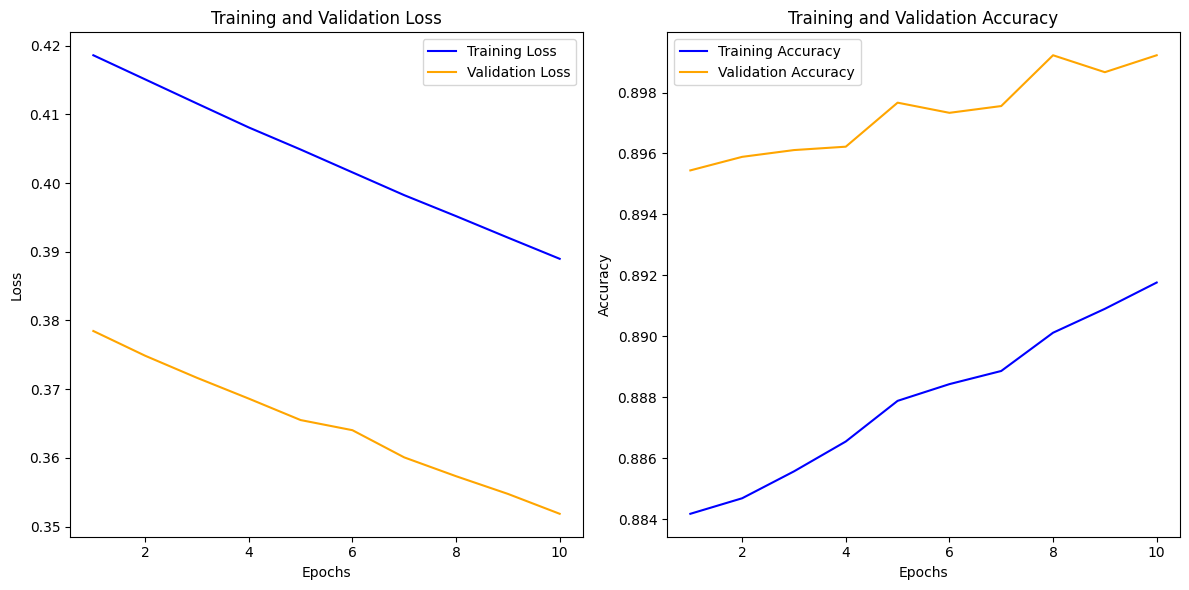

In [ ]:
import matplotlib.pyplot as plt
# Assuming 'history' is the object returned by model.fit()
# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.8935 - loss: 0.3749
Test accuracy: 0.8935


In [ ]:

# Assuming x_test and y_test are your test data and labels
loss, accuracy = model.evaluate(x_test, y_test, batch_size=32, verbose=1)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8790 - loss: 0.4236
Test Loss: 0.37488749623298645
Test Accuracy: 0.8934999704360962


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.8935 - loss: 0.3749
Test accuracy: 0.8935


In [ ]:
model.predict(
x_test,
batch_size=32,
verbose=0,
steps=None,
callbacks=None,
)


array([[3.08777031e-04, 3.72920169e-07, 1.23522186e-04, ...,
        9.89737511e-01, 2.07521571e-05, 5.25333127e-03],
       [5.83212497e-03, 1.99131551e-04, 7.88956702e-01, ...,
        2.74121362e-07, 2.34411564e-02, 8.37395021e-07],
       [4.03838873e-09, 9.76757824e-01, 1.13230599e-02, ...,
        4.81879804e-04, 4.98514296e-03, 2.94985808e-03],
       ...,
       [4.47098074e-07, 1.12351857e-03, 1.36509916e-04, ...,
        3.95152019e-04, 2.67820228e-02, 1.82377249e-01],
       [4.28752881e-03, 1.28595930e-04, 3.05493386e-03, ...,
        7.70113766e-05, 2.50592917e-01, 2.65179318e-03],
       [3.41935316e-04, 1.70774300e-07, 6.06525596e-03, ...,
        1.05457145e-08, 8.61107110e-05, 7.71126849e-07]], dtype=float32)

In [ ]:
# Predict on test data
predictions = model.predict(x_test)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted label for first image: 7
True label for first image: 7


In [ ]:
model.save('mnist_fully_connected_model.h5')

In [ ]:
loaded_model = tf.keras.models.load_model('mnist_fully_connected_model.h5')